## Black Friday Dataset EDA And Feature Engineering
### Cleaning and preparing the data for model training

In [ ]:
## dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv
# Importing necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# Table of Contents

*   [Black Friday Dataset EDA And Feature Engineering](#scrollTo=1b8d424a)
    *   [Cleaning and preparing the data for model training](#scrollTo=1b8d424a)
*   [Problem Statement](#scrollTo=fc4411e3)
*   [Data Loading and Merging](#scrollTo=c11b3cde)
*   [Basic Data Exploration](#scrollTo=663221b9)
*   [Data Cleaning and Preprocessing](#scrollTo=27ecb6b5)
    *   [Handling Categorical Features](#scrollTo=41440b97)
    *   [Handling Missing Values](#scrollTo=97a1db89)
    *   [Handling 'Stay_In_Current_City_Years'](#scrollTo=92e68302)
*   [Data Visualization](#scrollTo=5001ec19)
*   [Feature Scaling](#scrollTo=091ed800)
*   [Model Training (Placeholder)](#scrollTo=9fa7b4df)

In [ ]:
# Importing the training dataset
df_train=pd.read_csv('/content/train.csv')
# Displaying the first 5 rows of the training data
display(df_train.head())

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
##  Importing the test dataset
df_test=pd.read_csv('/content/test.csv')
# Displaying the first 5 rows of the test data
display(df_test.head())

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
## Merge both train and test dataframes
df=pd.concat([df_train,df_test], ignore_index=True)
# Displaying the first 5 rows of the merged dataframe
display(df.head())

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
## Basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [ ]:
# Descriptive statistics of the dataframe
display(df.describe())

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
# Dropping the 'User_ID' column as it's not needed for modeling
df.drop(['User_ID'],axis=1,inplace=True)

In [ ]:
# Displaying the first 5 rows after dropping 'User_ID'
display(df.head())

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
# Handling categorical feature 'Gender' using mapping
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [ ]:
# Displaying the first 5 rows after encoding 'Gender'
display(df.head())

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
## Displaying unique values in the 'Age' column
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
# Mapping 'Age' categories to numerical values
#pd.get_dummies(df['Age'],drop_first=True)
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [ ]:
## Second technique for encoding 'Age' using LabelEncoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])

# Displaying unique values in the 'Age' column after encoding
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [ ]:
# Displaying the first 5 rows after encoding 'Age'
display(df.head())

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
## Fixing categorical 'City_Category' using one-hot encoding
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [ ]:
# Displaying the first 5 rows of the one-hot encoded 'City_Category'
display(df_city.head())

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [ ]:
# Concatenating the one-hot encoded 'City_Category' with the main dataframe
df=pd.concat([df,df_city],axis=1)
# Displaying the first 5 rows after concatenation
display(df.head())

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,False,True


In [ ]:
## Dropping the original 'City_Category' column
df.drop('City_Category',axis=1,inplace=True)

In [ ]:
# Displaying the first 5 rows after dropping 'City_Category'
display(df.head())

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,False,True


In [ ]:
## Checking for missing values
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809
Purchase,233599


In [ ]:
## Focusing on replacing missing values in 'Product_Category_2'
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
# Displaying value counts for 'Product_Category_2'
df['Product_Category_2'].value_counts()

,count
Product_Category_2,
8.0,91317
14.0,78834
2.0,70498
16.0,61687
15.0,54114
5.0,37165
4.0,36705
6.0,23575
11.0,20230


In [ ]:
# Getting the mode of 'Product_Category_2'
df['Product_Category_2'].mode()[0]

np.float64(8.0)

In [ ]:
## Replace the missing values in 'Product_Category_2' with the mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [ ]:
# Checking for missing values in 'Product_Category_2' after filling
df['Product_Category_2'].isnull().sum()

np.int64(0)

In [ ]:
## Displaying unique values in 'Product_Category_3' to replace missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [ ]:
# Displaying value counts for 'Product_Category_3'
df['Product_Category_3'].value_counts()

,count
Product_Category_3,
16.0,46469
15.0,39968
14.0,26283
17.0,23818
5.0,23799
8.0,17861
9.0,16532
12.0,13115
13.0,7849


In [ ]:
## Replace the missing values in 'Product_Category_3' with the mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [ ]:
# Displaying the first 5 rows after filling missing values in 'Product_Category_3'
display(df.head())

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969.0,False,True


In [ ]:
# Displaying the shape of the dataframe
df.shape

(783667, 12)

In [ ]:
# Displaying unique values in 'Stay_In_Current_City_Years'
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
# Removing '+' from 'Stay_In_Current_City_Years'
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [ ]:
# Displaying the first 5 rows after removing '+'
display(df.head())

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,False,True


In [ ]:
# Displaying information about the dataframe after removing '+'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(5), object(2)
memory usage: 61.3+ MB


In [ ]:
## Converting 'Stay_In_Current_City_Years' to integer type
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
# Displaying information about the dataframe after type conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(6), object(1)
memory usage: 61.3+ MB


In [ ]:
# Converting 'B' and 'C' columns to integer type
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [ ]:
# Displaying information about the dataframe after type conversion of 'B' and 'C'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


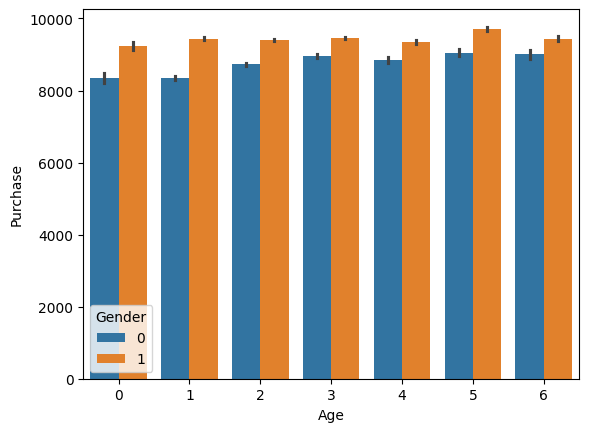

In [ ]:
## Visualisation of Age vs Purchased
# Creating a bar plot to visualize the relationship between Age, Purchase, and Gender
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)
plt.show()

## Purchasing of men is high then women

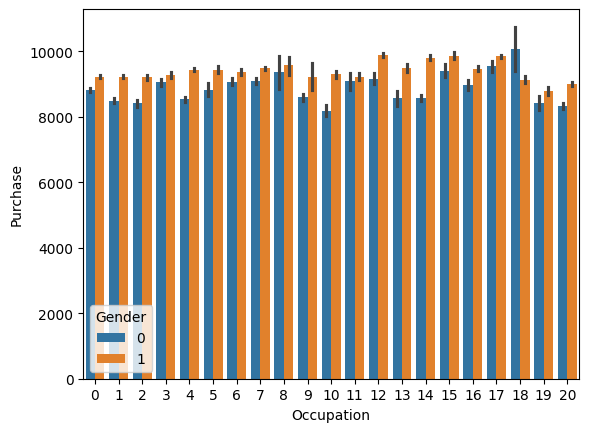

In [ ]:
## Visualization of Purchase with occupation
# Creating a bar plot to visualize the relationship between Occupation, Purchase, and Gender
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)
plt.show()

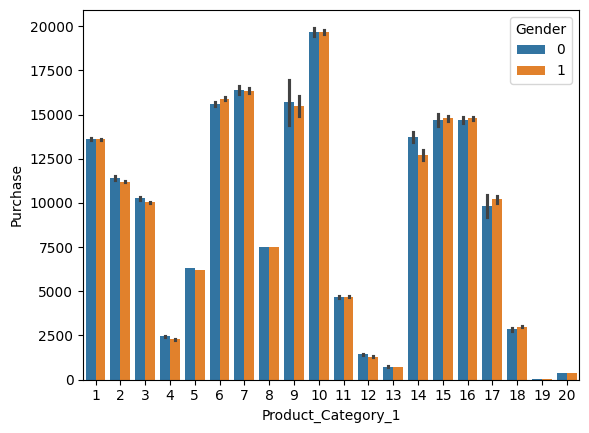

In [ ]:
# Creating a bar plot to visualize the relationship between Product_Category_1, Purchase, and Gender
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)
plt.show()

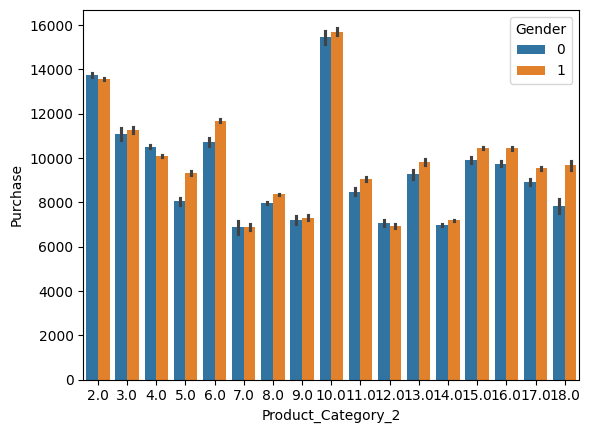

In [ ]:
# Creating a bar plot to visualize the relationship between Product_Category_2, Purchase, and Gender
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)
plt.show()

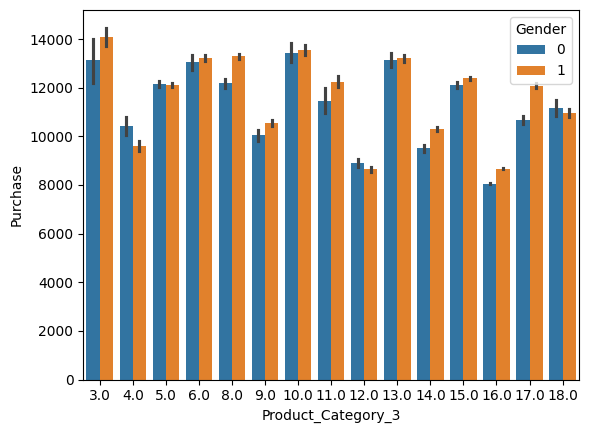

In [ ]:
# Creating a bar plot to visualize the relationship between Product_Category_3, Purchase, and Gender
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)
plt.show()

In [ ]:
# Displaying the first 5 rows of the dataframe
display(df.head())

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


In [ ]:
## Feature Scaling
# Separating the test data (where 'Purchase' is null)
df_test=df[df['Purchase'].isnull()]

In [ ]:
# Separating the training data (where 'Purchase' is not null)
df_train=df[~df['Purchase'].isnull()]

In [ ]:
# Defining the features (X) for the training data by dropping the 'Purchase' column
X=df_train.drop('Purchase',axis=1)

In [ ]:
# Displaying the first 5 rows of the features dataframe
display(X.head())

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,0,1


In [ ]:
# Displaying the shape of the features dataframe
X.shape

(550068, 11)

In [ ]:
# Defining the target variable (y) for the training data
y=df_train['Purchase']

In [ ]:
# Displaying the shape of the target variable
y.shape

(550068,)

In [ ]:
# Displaying the target variable
display(y)

,Purchase
0,8370.0
1,15200.0
2,1422.0
3,1057.0
4,7969.0
...,...
550063,368.0
550064,371.0
550065,137.0
550066,365.0


In [ ]:
# Importing train_test_split for splitting the data
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [ ]:
# Dropping 'Product_ID' from the training and testing feature sets
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [ ]:
## Feature Scaling
# Importing StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler
# Initializing the StandardScaler
sc=StandardScaler()
# Fitting and transforming the training data
X_train=sc.fit_transform(X_train)
# Transforming the testing data
X_test=sc.transform(X_test)